In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def clean_solar_dataframe(df):
    # Step 1: Convert 'Timestamp' to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Step 2: Keep only relevant columns
    required_cols = ['Timestamp', 'GHI', 'DNI', 'DHI', 'Tamb']
    df = df[required_cols].dropna()

    # Step 3: Convert columns to numeric (if necessary)
    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna()

    # Step 4: Remove outliers using IQR method
    Q1 = df[['GHI', 'DNI', 'DHI', 'Tamb']].quantile(0.25)
    Q3 = df[['GHI', 'DNI', 'DHI', 'Tamb']].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[['GHI', 'DNI', 'DHI', 'Tamb']] < (Q1 - 1.5 * IQR)) |
              (df[['GHI', 'DNI', 'DHI', 'Tamb']] > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df


In [3]:
def plot_solar_data(df, country_name):
    plt.figure(figsize=(14, 6))
    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        plt.plot(df['Timestamp'], df[col], label=col)
    
    plt.xlabel("Timestamp")
    plt.ylabel("Values")
    plt.title(f"Solar Irradiance & Temperature Over Time - {country_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\3812447710.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benin = pd.read_csv("../data/benin.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\3812447710.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_benin = pd.read_csv("../data/benin.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\3005706817.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'],

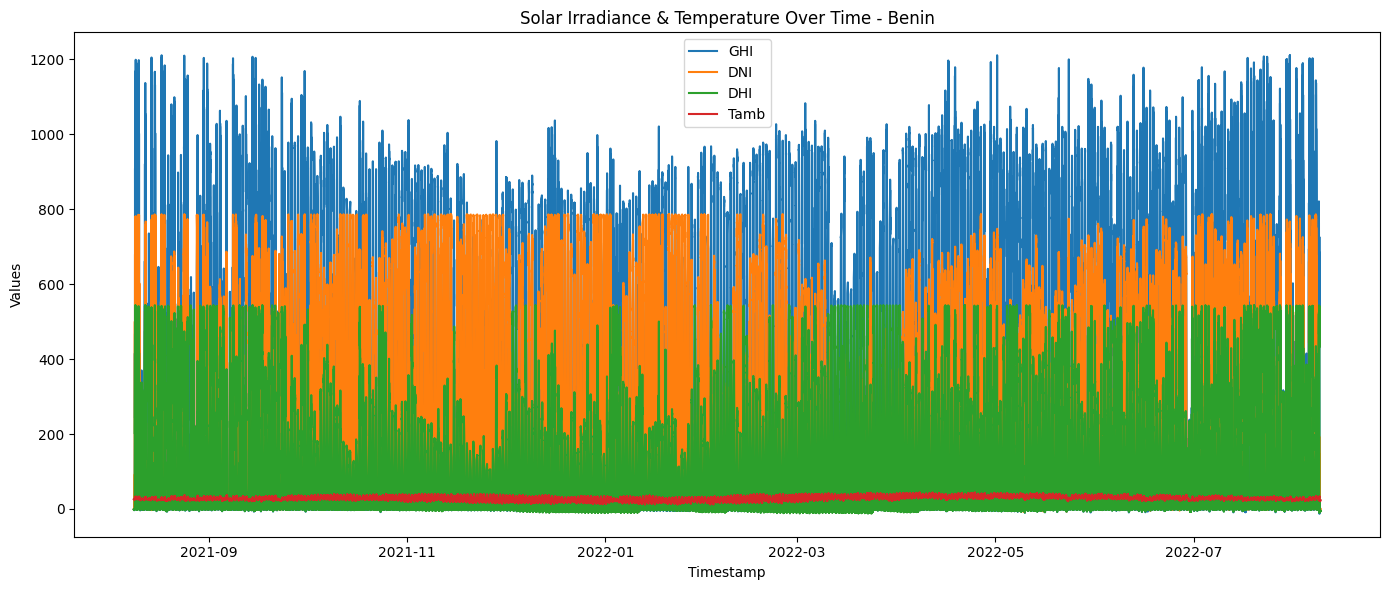

In [ ]:
df_benin = pd.read_csv("../data/benin.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
df_benin_clean = clean_solar_dataframe(df_benin)
plot_solar_data(df_benin_clean, "Benin")


C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\1255760119.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sierra = pd.read_csv("../data/sierra.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\1255760119.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sierra = pd.read_csv("../data/sierra.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\3005706817.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestam

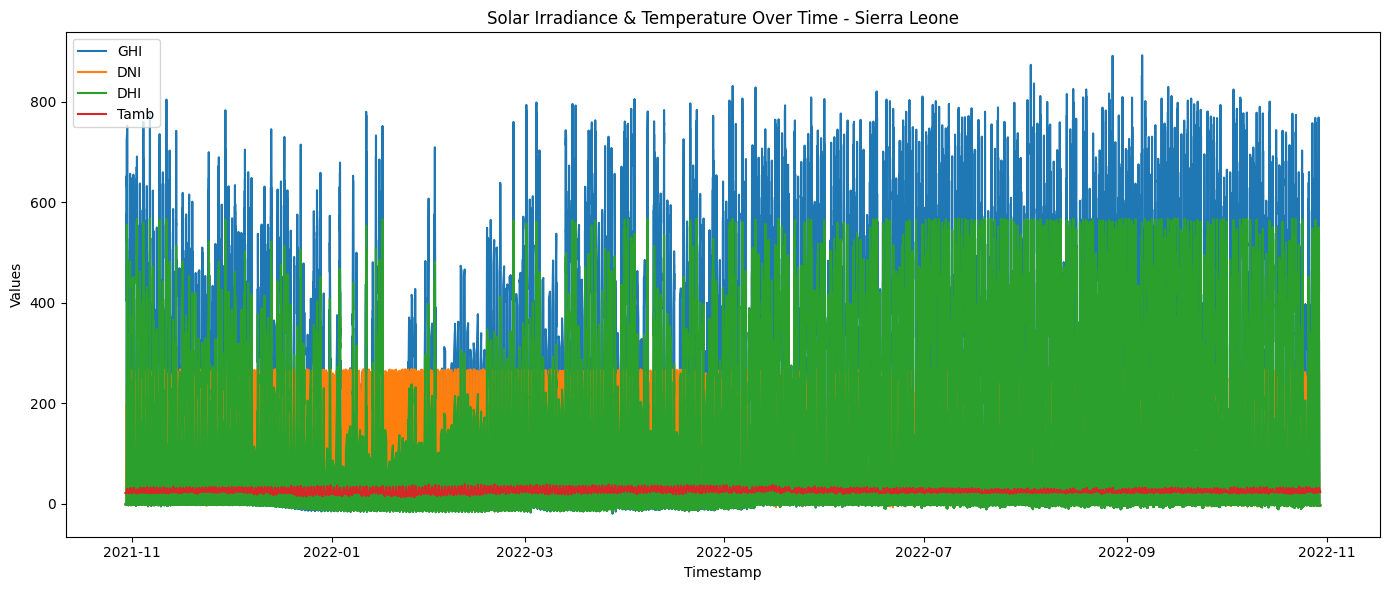

In [13]:
df_sierra = pd.read_csv("../data/sierra.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
df_sierra_clean = clean_solar_dataframe(df_sierra)
plot_solar_data(df_sierra_clean, "Sierra Leone")


C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\3925450496.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_togo = pd.read_csv("../data/togo.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\3925450496.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_togo = pd.read_csv("../data/togo.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
C:\Users\kidan.DESKTOP-UUQ68QV\AppData\Local\Temp\ipykernel_17020\3005706817.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], 

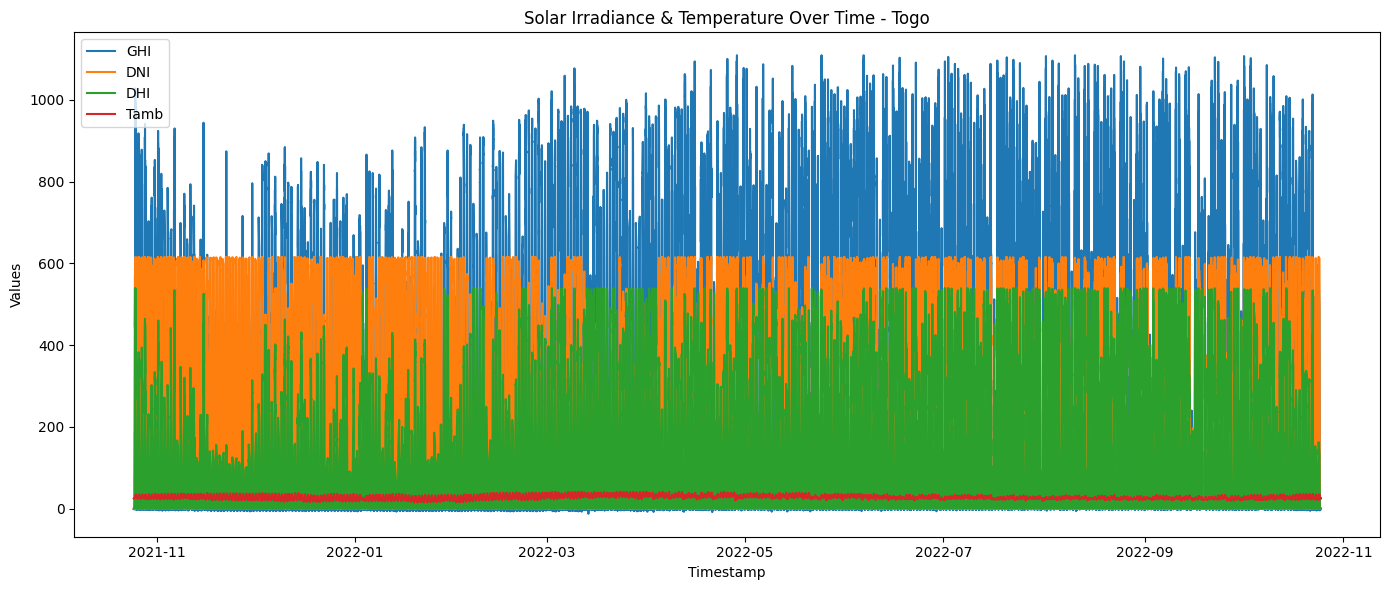

In [12]:
df_togo = pd.read_csv("../data/togo.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1')
df_togo_clean = clean_solar_dataframe(df_togo)
plot_solar_data(df_togo_clean, "Togo")


In [14]:
def clean_solar_data(df):
    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df.dropna(subset=['Timestamp'], inplace=True)

    # Convert relevant columns to numeric
    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with missing values
    df.dropna(subset=['GHI', 'DNI', 'DHI', 'Tamb'], inplace=True)

    # Remove outliers using Z-score
    z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'Tamb']]))
    df = df[(z_scores < 3).all(axis=1)]

    return df


In [15]:
df_benin_clean = clean_solar_data(df_benin)
df_sierra_clean = clean_solar_data(df_sierra)
df_togo_clean = clean_solar_data(df_togo)


NameError: name 'np' is not defined

In [ ]:
df_benin_clean['Country'] = 'Benin'
df_sierra_clean['Country'] = 'Sierra Leone'
df_togo_clean['Country'] = 'Togo'


In [16]:
combined_df = pd.concat([df_benin_clean, df_sierra_clean, df_togo_clean])


In [17]:
combined_df.groupby('Country')['GHI'].mean().plot(kind='bar', title='Average GHI by Country', ylabel='GHI (W/m²)', xlabel='Country')
plt.tight_layout()
plt.show()


KeyError: 'Country'